<a href="https://colab.research.google.com/github/ashishakonnur/Stroke-Predicition/blob/main/Stroke_Prediction_using_ML_Classification_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stroke prediction using ML Classification Algorithms

Build a model that can be used to predict stroke.

## Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product


from sklearn.inspection import permutation_importance



data = pd.read_csv('https://raw.githubusercontent.com/ashishakonnur/Stroke-Predicition/main/healthcare-dataset-stroke-data.csv')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Transpose index and columns
data.head(5).T

,0,1,2,3,4
id,9046,51676,31112,60182,1665
gender,Male,Female,Male,Female,Female
age,67,61,80,49,79
hypertension,0,0,0,0,1
heart_disease,1,0,1,0,0
ever_married,Yes,Yes,Yes,Yes,Yes
work_type,Private,Self-employed,Private,Private,Self-employed
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,228.69,202.21,105.92,171.23,174.12
bmi,36.6,NaN,32.5,34.4,24



## Data Types & Data Cleaning

In [3]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000



As shown above, the number of rows (samples) is 5110 and number of columns (variables) is 12. There are some missing values (indicated by NaN). Now, we want to check how many missing values exist in each variable. As well as BMI values need to be imputed.

In [4]:
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
# no null values to deal with
miss_val = data.isnull().sum()/len(data)*100
print(miss_val)
print("# Missing values in variable bmi\t\t: {:.2f}%".format(miss_val['bmi']))
print("Data shape: {}".format(data.shape))

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64
# Missing values in variable bmi		: 3.93%
Data shape: (5110, 12)


### Missing/NaN values

In [6]:
# replace missing values in variable 'bmi' with its mean
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

# remove (drop) data associated with missing values in variable 'smoking_status'
df = data[data['smoking_status'].notnull()]

# drop variable 'id'
df.drop(columns='id',axis=1,inplace=True)

# validate there's no more missing values
miss_val = df.isnull().sum()/len(df)*100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("Shape of data without missing values: {}".format(df.shape))

gender               0.0
age                  0.0
hypertension         0.0
heart_disease        0.0
ever_married         0.0
work_type            0.0
Residence_type       0.0
avg_glucose_level    0.0
bmi                  0.0
smoking_status       0.0
stroke               0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
Shape of data without missing values: (5110, 11)


## Changing Category to Numerical Values

In [7]:
# Check the values of categories
print("Unique 'gender': {}".format(df['gender'].unique()))
print("Unique 'ever_married': {}".format(df['ever_married'].unique()))
print("Unique 'work_type': {}".format(df['work_type'].unique()))
print("Unique 'Residence_type': {}".format(df['Residence_type'].unique()))
print("Unique 'smoking_status': {}".format(df['smoking_status'].unique()))

Unique 'gender': ['Male' 'Female' 'Other']
Unique 'ever_married': ['Yes' 'No']
Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique 'Residence_type': ['Urban' 'Rural']
Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [8]:
# create encoder for each categorical variable
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_gender = LabelEncoder()
label_married = LabelEncoder()
label_work = LabelEncoder()
label_residence = LabelEncoder()
label_smoking = LabelEncoder()

In [9]:
df['gender'] = label_gender.fit_transform(df['gender'])
df['ever_married'] = label_married.fit_transform(df['ever_married'])
df['work_type']= label_work.fit_transform(df['work_type'])
df['Residence_type']= label_residence.fit_transform(df['Residence_type'])
df['smoking_status']= label_smoking.fit_transform(df['smoking_status'])
with pd.option_context('expand_frame_repr', False):
    print(df.head(6).T)

                        0           1       2       3       4       5
gender               1.00    0.000000    1.00    0.00    0.00    1.00
age                 67.00   61.000000   80.00   49.00   79.00   81.00
hypertension         0.00    0.000000    0.00    0.00    1.00    0.00
heart_disease        1.00    0.000000    1.00    0.00    0.00    0.00
ever_married         1.00    1.000000    1.00    1.00    1.00    1.00
work_type            2.00    3.000000    2.00    2.00    3.00    2.00
Residence_type       1.00    0.000000    0.00    1.00    0.00    1.00
avg_glucose_level  228.69  202.210000  105.92  171.23  174.12  186.21
bmi                 36.60   28.893237   32.50   34.40   24.00   29.00
smoking_status       1.00    2.000000    2.00    3.00    2.00    1.00
stroke               1.00    1.000000    1.00    1.00    1.00    1.00


- Unique 'gender': ['Male' 'Female' 'Other'][0,1,2]
- Unique 'ever_married': ['Yes' 'No'][0,1]
- Unique 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']0,1,2,3,4]
- Unique 'Residence_type': ['Urban' 'Rural'][0,1]
- Unique 'smoking_status': ['formerly smoked' 'never smoked' 'smokes' 'Unknown'][0,1,2,3]

The data here looks good so far. Do check if anything else need to be done.

# Descriptive Analytics

## Correlation of features

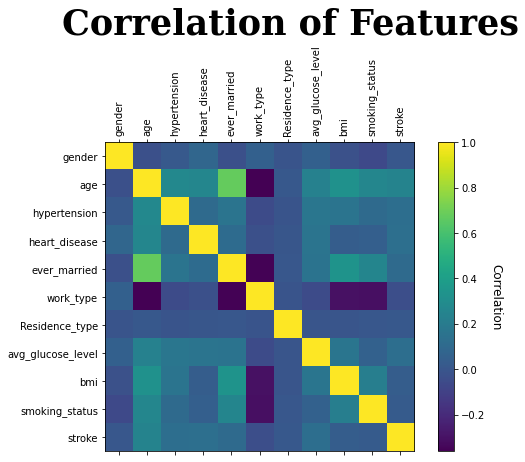

In [10]:
fig, ax = plt.subplots(figsize=(8,6))
im = ax.matshow(df.corr())
ax.set_xticks(np.arange(df.shape[1]))
ax.set_yticks(np.arange(df.shape[1]))
ax.set_xticklabels(df.columns,rotation=90)
ax.set_yticklabels(df.columns)
# Create colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Correlation", rotation=-90, va="bottom", fontsize=12)
fig.tight_layout()
fig.text(0.20,1,'Correlation of Features',{'fontname':'Serif', 'weight':'bold','color': 'black', 'size':35})
plt.show()

Useful to measure the inter-feature correlation.
- 'ever_married' and 'age' seem to have positive correlation
- 'work_type' and 'age'
- 'work_type' and 'marriage'

Observation:

Variables that are showing some effective correlation are:

age, hypertension, heart_disease, ever_married, avg_glucose_level.

## Pie Chart of Stroke Data

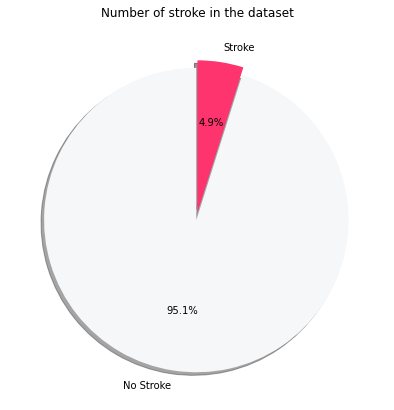

In [11]:
# We want to have general understanding of Dataset, by find

labels = ['No Stroke','Stroke']
sizes = df['stroke'].value_counts(sort = True)

colors = ["#f6f7f9","#fe346e"]
explode = (0.05,0) 
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Number of stroke in the dataset')
plt.show()

In [12]:
import plotly.graph_objects as go

len_data = len(data)
len_w = len(data[data["gender"]=="Male"])
len_m = len_data - len_w

men_stroke = len(data.loc[(data["stroke"]==1)&(data['gender']=="Male")])
men_no_stroke = len_m - men_stroke

women_stroke = len(data.loc[(df["stroke"]==1) & (data['gender']=="Female")])
women_no_stroke = len_w - women_stroke

labels = ['Men with stroke','Men healthy','Women with stroke','Women healthy']
values = [men_stroke, men_no_stroke, women_stroke, women_no_stroke]

fig = go.Figure(data=[go.Pie(labels=labels, values=values,textinfo='label+percent',hole=0.7)])
fig.update_layout(
    title_text="Distribution of stroke EVENT according to their gender")
fig.show()

The class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

## Histogram of features

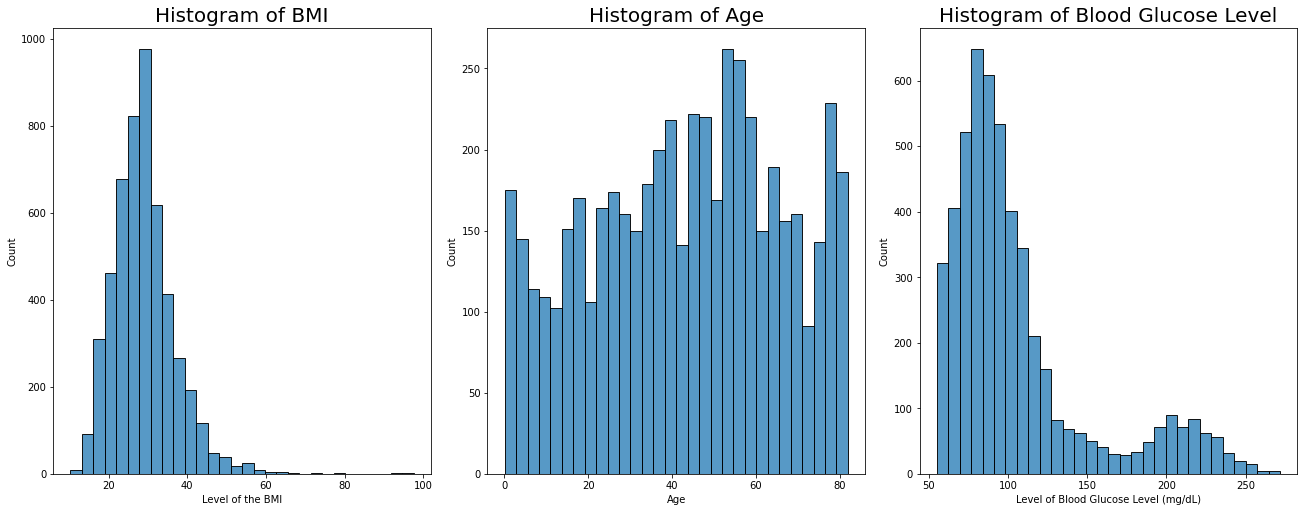

In [13]:
import matplotlib.pyplot as plt

def plot_hist(col, bins=30, title="",xlabel="",ax=None):
    sns.histplot(col, bins=bins,ax=ax)
    ax.set_title(f'Histogram of {title}',fontsize=20)
    ax.set_xlabel(xlabel)

fig, axes = plt.subplots(1,3,figsize=(18,7),constrained_layout=True)
plot_hist(df.bmi,
          title='BMI',
          xlabel="Level of the BMI",
          ax=axes[0])

plot_hist(df.age,
          bins=30,
          title='Age',
          xlabel='Age',
          ax=axes[1])

plot_hist(df.avg_glucose_level,
          title='Blood Glucose Level', 
          xlabel='Level of Blood Glucose Level (mg/dL)',
          ax=axes[2])

plt.show()

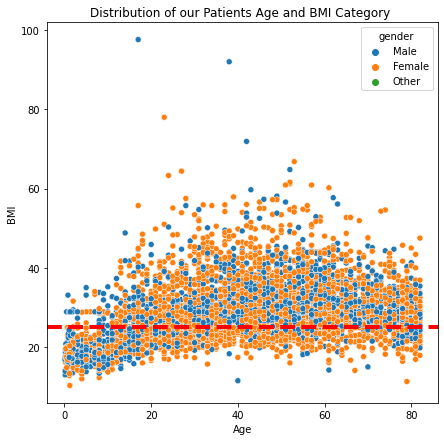

In [14]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=data, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--') # y=25 is healthy BMI line
plt.title('Distribution of our Patients Age and BMI Category ')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

Observation⚫
* Most of the patients are above the Healthy BMI range of 25, meaning obese and unhealthy

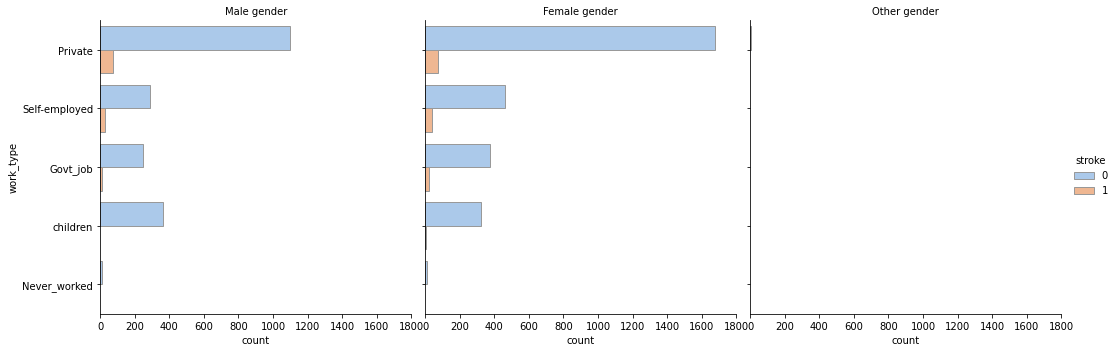

In [15]:

g=sns.catplot(y="work_type", hue="stroke", kind="count",legend=True,
            palette="pastel", edgecolor=".6", col = 'gender',
            data=data) # Using data here to display attributes
(g.set_axis_labels()
  .set_xticklabels()
  .set_titles("{col_name} {col_var}")
  )  

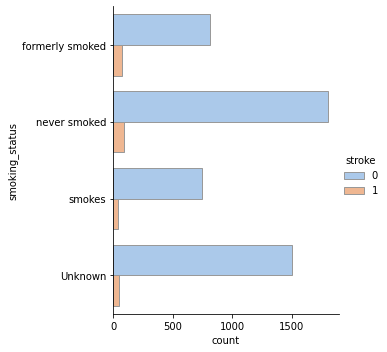

In [16]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=data)

Observation:

* In term of proportion private and self-employed have the similar amount of people having a stroke. However people from the government are more likely to not have a stroke compared to both first gategories moreover chlidren are not very likely to get a stroke. Maybe that could be explain due to the degree of pressure felt by workers
* We can conclude that Work_Type has influence on Stroke patient, and further categorising into different gender assures there is no significant relationship
* Surprisingly, it seems that the stroke is not highly correlated to smokers since the proportion of people having a stroke is fairly the same among the different smoking status.

##Feature Correleation

[Parallel Coordinates Plot in Python](https://plotly.com/python/parallel-coordinates-plot/)

In [17]:
import plotly.express as px

fig = px.parallel_categories(data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type',
       'smoking_status', 'stroke']], color='stroke', color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

# Data Preprocessing

## Handling Imbalanced Data

* There are several techniques that can be used to handle highly imbalanced class. This article nicely summarises those different techniques. In this dataset, we are going to use one of oversampling technique called Synthetic Minority Oversampling Technique (SMOTE), by synthesising new samples from the minority class to have the same number of samples as the majority class (illustrated in figure below). 
* Oversampling technique is chosen because we do not want to loose significant amount of information (95.1%) as if we use undersampling technique.

[Imbalanced data technique](https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html)

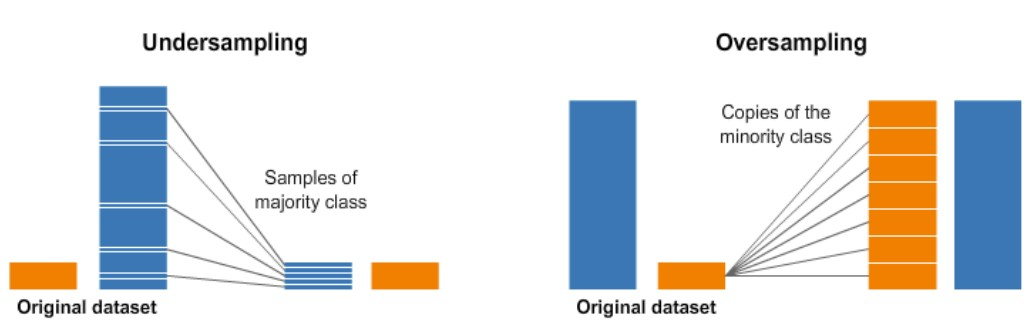

In [18]:
from imblearn.over_sampling import SMOTE

# create the  object with the desired sampling strategy.
smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
X, y = smote.fit_sample(df.loc[:,df.columns!='stroke'], df['stroke'])
print("Shape of X_Train: {}".format(X.shape)) # every column except Stroke Column
print("Shape of y_Train: {}".format(y.shape)) # Only Stroke column

Shape of X_Train: (9722, 10)
Shape of y_Train: (9722,)


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



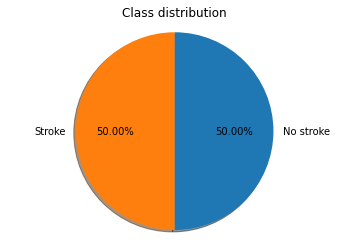

# samples associated with no stroke: 4861
# samples associated with stroke: 4861


In [19]:
_, class_counts = np.unique(y, return_counts=True)
class_names = ['No stroke', 'Stroke']
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.2f%%',
        shadow=True, startangle=90, counterclock=False)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title('Class distribution')
plt.show()

print("# samples associated with no stroke: {}".format(class_counts[0]))
print("# samples associated with stroke: {}".format(class_counts[1]))

## Split Data into Train, Test and Validate

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)

print("[train] # class 0: {} | # class 1: {}".format(train_counts[0],train_counts[1]))
print("[test]  # class 0: {} | # class 1: {}".format(test_counts[0],test_counts[1]))

[train] # class 0: 3886 | # class 1: 3891
[test]  # class 0: 975 | # class 1: 970


## Normalization

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.

[Why Normalization is necessary](https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029)

In [21]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
scaler = scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# ML Model Training and Evaluation


We will implement and benchmark the performance of the following 7 ML algorithms:

1. Singular Vector Machine (SVM)
2. Gaussian Naive Bayes (GNB)
3. Logistic Regression (LR)
4. Decision Tree (DT)
5. Random Forest (RF)
6. K Means Clustering (KNN)



##Performance Metrics
The peformance will be evaluated based on two different groups of metrics:

1. Sensitivity, specificity, and area under the curve (AUC)
2. Precision, recall, and F1 score

In [22]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]

    # calculate the sensitivity
    sensitivity = TP / (TP + FN) 

    # calculate the specificity
    specificity = TN / (TN + FP)
    
    return sensitivity,specificity

## ML Models:

### Singular Vector Machine (SVM)

In [23]:
import time as timer
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf',probability=True)
svm_model.fit(X_train_std, y_train)

# Predicting the test set results
y_svm = svm_model.predict(X_test_std)
y_svm_prob = svm_model.predict_proba(X_test_std)

Classification report for SVM: 
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       975
           1       0.91      0.89      0.90       970

    accuracy                           0.90      1945
   macro avg       0.90      0.90      0.90      1945
weighted avg       0.90      0.90      0.90      1945

Confusion matrix for SVM: 
[[886  89]
 [109 861]]
Accuracy score for SVM: 0.90
Precision score for SVM: 0.91
Recall score for SVM: 0.89
F1 score for SVM: 0.90
Sensitivity score for SVM: 0.89
Specitivity score for SVM: 0.91
AUC score for SVM: 0.97


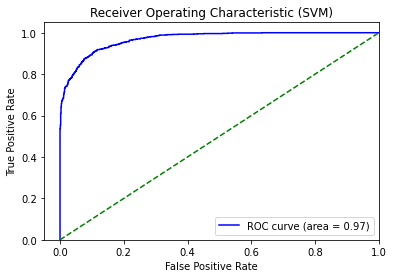

In [24]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.metrics import auc,roc_auc_score,roc_curve,precision_score,recall_score,f1_score


print("Classification report for SVM: \n{}".format(classification_report(y_test,y_svm)))
print("Confusion matrix for SVM: \n{}".format(confusion_matrix(y_test,y_svm)))
print("Accuracy score for SVM: {:.2f}".format(accuracy_score(y_test,y_svm)))

# calculate precision, recall, and f1 scores
prec_svm = precision_score(y_test,y_svm)
rec_svm = recall_score(y_test,y_svm)
f1_svm = f1_score(y_test,y_svm)
print("Precision score for SVM: {:.2f}".format(prec_svm))
print("Recall score for SVM: {:.2f}".format(rec_svm))
print("F1 score for SVM: {:.2f}".format(f1_svm))

# calculate sensitivity, specificity, and auc
sens_svm,spec_svm = calc_sens_spec(y_test,y_svm)
fpr, tpr, _ = roc_curve(y_test,  y_svm_prob[:,1])
auc_svm = roc_auc_score(y_test, y_svm_prob[:,1])
print("Sensitivity score for SVM: {:.2f}".format(sens_svm))
print("Specitivity score for SVM: {:.2f}".format(spec_svm))
print("AUC score for SVM: {:.2f}".format(auc_svm))

# plotting Graph
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_svm)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (SVM)')
ax.legend(loc="lower right")
plt.show()

###Gaussian Naive Bayes (GNB)

In [25]:
from sklearn.naive_bayes import GaussianNB


gnb_model = GaussianNB()
gnb_model.fit(X_train_std, y_train)

# Predicting the test set results
y_gnb = gnb_model.predict(X_test_std)
y_gnb_prob = gnb_model.predict_proba(X_test_std)

Classification report for GNB: 
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       975
           1       0.74      0.82      0.78       970

    accuracy                           0.77      1945
   macro avg       0.77      0.77      0.76      1945
weighted avg       0.77      0.77      0.76      1945

Confusion matrix for GNB: 
[[696 279]
 [177 793]]
Accuracy score for GNB: 0.77
Precision score for GNB: 0.74
Recall score for GNB: 0.82
F1 score for GNB: 0.78
Sensitivity score for GNB: 0.82
Specitivity score for GNB: 0.71
AUC score for GNB: 0.82


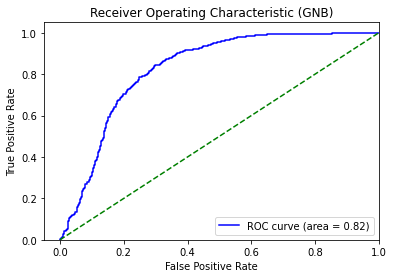

In [26]:
print("Classification report for GNB: \n{}".format(classification_report(y_test,y_gnb)))
print("Confusion matrix for GNB: \n{}".format(confusion_matrix(y_test,y_gnb)))
print("Accuracy score for GNB: {:.2f}".format(accuracy_score(y_test,y_gnb)))

# calculate precision, recall, and f1 scores
prec_gnb = precision_score(y_test,y_gnb)
rec_gnb = recall_score(y_test,y_gnb)
f1_gnb = f1_score(y_test,y_gnb)
print("Precision score for GNB: {:.2f}".format(prec_gnb))
print("Recall score for GNB: {:.2f}".format(rec_gnb))
print("F1 score for GNB: {:.2f}".format(f1_gnb))

# calculate sensitivity, specificity, and auc
sens_gnb,spec_gnb = calc_sens_spec(y_test,y_gnb)
fpr, tpr, _ = roc_curve(y_test,  y_gnb_prob[:,1])
auc_gnb = roc_auc_score(y_test, y_gnb_prob[:,1])
print("Sensitivity score for GNB: {:.2f}".format(sens_gnb))
print("Specitivity score for GNB: {:.2f}".format(spec_gnb))
print("AUC score for GNB: {:.2f}".format(auc_gnb))

# plotting Graph
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_gnb)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (GNB)')
ax.legend(loc="lower right")
plt.show()

###Logistic Regression (LR)

In [27]:
from sklearn.linear_model import LogisticRegression


logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train_std, y_train)

# Predicting the test set results
y_logit = logit_model.predict(X_test_std)
y_logit_prob = logit_model.predict_proba(X_test_std)

Classification report for LR: 
              precision    recall  f1-score   support

           0       0.78      0.74      0.76       975
           1       0.75      0.79      0.77       970

    accuracy                           0.76      1945
   macro avg       0.76      0.76      0.76      1945
weighted avg       0.76      0.76      0.76      1945

Confusion matrix for LR: 
[[718 257]
 [207 763]]
Accuracy score for LR: 0.76
Precision score for LR: 0.75
Recall score for LR: 0.79
F1 score for LR: 0.77
Sensitivity score for LR: 0.79
Specitivity score for LR: 0.74
AUC score for LR: 0.84


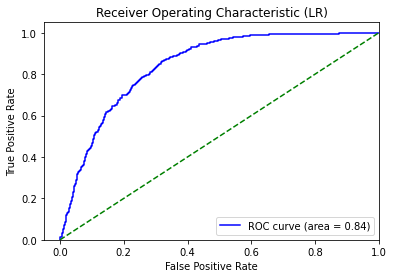

In [28]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))

# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))

# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)
fpr, tpr, _ = roc_curve(y_test,  y_logit_prob[:,1])
auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))

# plotting Graph
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_logit)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

###Decision Tree (DT)

In [29]:
from sklearn.tree import DecisionTreeClassifier

start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train_std, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test_std)
y_dtree_prob = dtree_model.predict_proba(X_test_std)

Finished training within 0.04 seconds


Classification report for DT: 
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       975
           1       0.93      0.94      0.94       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

Confusion matrix for DT: 
[[904  71]
 [ 55 915]]
Accuracy score for DT: 0.94
Precision score for DT: 0.93
Recall score for DT: 0.94
F1 score for DT: 0.94
Sensitivity score for DT: 0.94
Specitivity score for DT: 0.93
AUC score for DT: 0.94


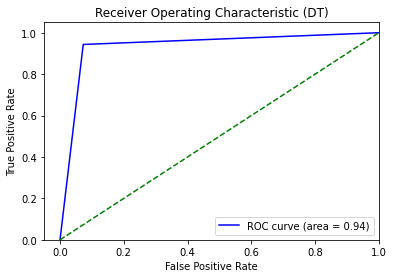

In [30]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))

# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))

# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)
fpr, tpr, _ = roc_curve(y_test,  y_dtree_prob[:,1])
auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))

# plotting Graph
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_dtree)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

###Random Forest (RF)

In [31]:
from sklearn.ensemble import RandomForestClassifier


ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train_std, y_train)

# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test_std)
y_ranfor_prob = ranfor_model.predict_proba(X_test_std)

Classification report for RF: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       975
           1       0.99      0.94      0.97       970

    accuracy                           0.97      1945
   macro avg       0.97      0.97      0.97      1945
weighted avg       0.97      0.97      0.97      1945

Confusion matrix for RF: 
[[968   7]
 [ 54 916]]
Accuracy score for RF: 0.97
Precision score for RF: 0.99
Recall score for RF: 0.94
F1 score for RF: 0.97
Sensitivity score for RF: 0.94
Specitivity score for RF: 0.99
AUC score for RF: 0.99


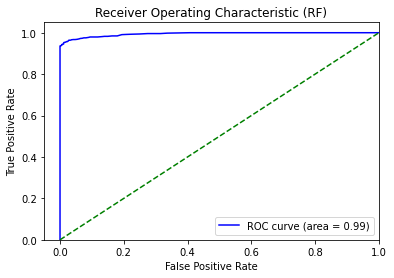

In [32]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))

# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))

# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)
fpr, tpr, _ = roc_curve(y_test,  y_ranfor_prob[:,1])
auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))

# plotting Graph
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_ranfor)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

###K Means Clustering (KNN)

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1) # Reason why we choose KNN=1 is shown below
knn.fit(X_train_std, y_train)
y_knn = knn.predict(X_test_std)
y_knn_prob = knn.predict_proba(X_test_std)[:,1]

Classification report for KNN: 
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       975
           1       0.93      0.99      0.96       970

    accuracy                           0.96      1945
   macro avg       0.96      0.96      0.96      1945
weighted avg       0.96      0.96      0.96      1945

Confusion matrix for KNN: 
[[908  67]
 [  8 962]]
Accuracy score for KNN: 0.96
Precision score for KNN: 0.75
Recall score for KNN: 0.79
F1 score for KNN: 0.77
Sensitivity score for KNN: 0.99
Specitivity score for KNN: 0.93
AUC score for KNN: 0.96


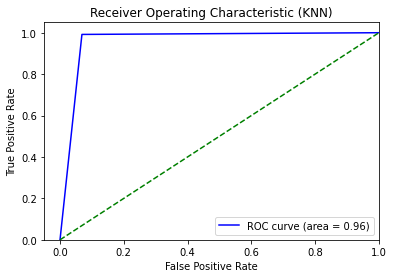

In [34]:
print("Classification report for KNN: \n{}".format(classification_report(y_test,y_knn)))
print("Confusion matrix for KNN: \n{}".format(confusion_matrix(y_test,y_knn)))
print("Accuracy score for KNN: {:.2f}".format(accuracy_score(y_test,y_knn)))

# calculate precision, recall, and f1 scores
prec_knn = precision_score(y_test,y_knn)
rec_knn = recall_score(y_test,y_knn)
f1_knn = f1_score(y_test,y_knn)
print("Precision score for KNN: {:.2f}".format(prec_logit))
print("Recall score for KNN: {:.2f}".format(rec_logit))
print("F1 score for KNN: {:.2f}".format(f1_logit))

# calculate sensitivity, specificity, and auc
sens_knn,spec_knn = calc_sens_spec(y_test,y_knn)
fpr, tpr, _ = roc_curve(y_test,  y_knn_prob)
auc_knn = roc_auc_score(y_test, y_knn_prob)
print("Sensitivity score for KNN: {:.2f}".format(sens_knn))
print("Specitivity score for KNN: {:.2f}".format(spec_knn))
print("AUC score for KNN: {:.2f}".format(auc_knn))

# plotting Graph
fig, ax = plt.subplots()
ax.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_knn)
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (KNN)')
ax.legend(loc="lower right")
plt.show()

In [35]:
error = []

# Calculating error for K values between 1 and 15
for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std, y_train)
    pred_i = knn.predict(X_test_std)
    error.append(np.mean(pred_i != y_test))

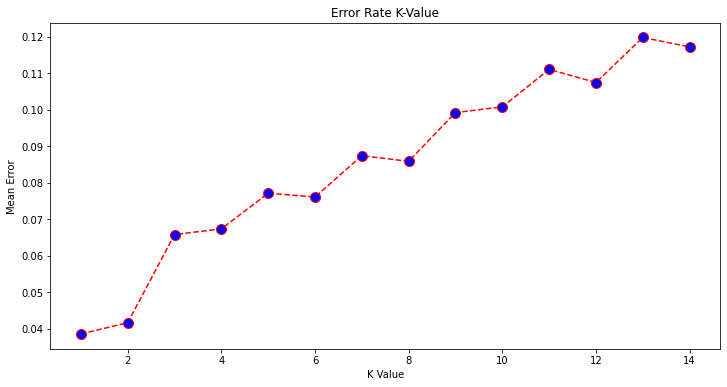

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 15), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K-Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

##Performance Benchmark Across Models

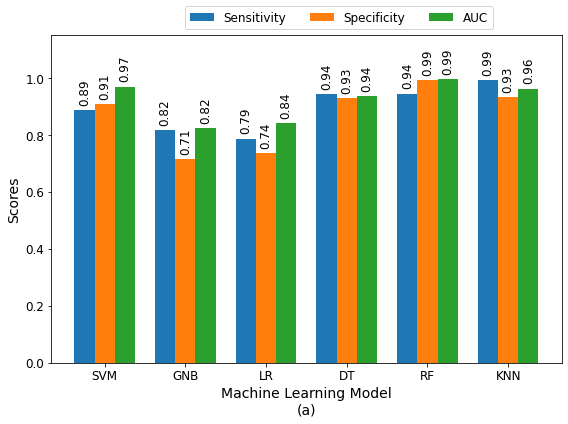

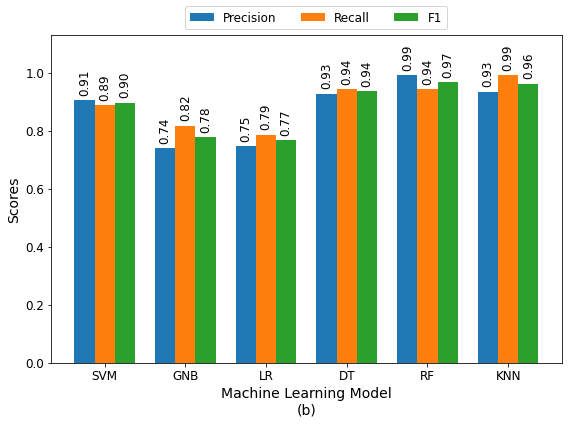

In [37]:
ml_names = ['SVM', 'GNB', 'LR', 'DT', 'RF', 'KNN']
sens_all = [sens_svm, sens_gnb, sens_logit, sens_dtree, sens_ranfor, sens_knn]
spec_all = [spec_svm, spec_gnb, spec_logit, spec_dtree, spec_ranfor, spec_knn]
auc_all = [auc_svm, auc_gnb, auc_logit, auc_dtree, auc_ranfor, auc_knn]

prec_all = [prec_svm, prec_gnb, prec_logit, prec_dtree, prec_ranfor, prec_knn]
rec_all = [rec_svm, rec_gnb, rec_logit, rec_dtree, rec_ranfor, rec_knn]
f1_all = [f1_svm, f1_gnb, f1_logit, f1_dtree, f1_ranfor, f1_knn]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.25  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()


##Selecting Most Important Features